In [1]:
import pandas as pd
import math
from datetime import datetime

import numpy as np
from pandas import Series, DataFrame
import nsepy as ns

In [2]:
sbin = ns.get_history(symbol="TATAMOTORS", 
                     start = datetime(2005,1,1),
                     end = datetime(2021,3,14))

In [3]:
sbin.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2005-01-03,TATAMOTORS,EQ,505.25,509.90,523.40,508.5,522.5,520.45,517.20,2947420,1.524399e+14,NaN,785505.0,0.2665
2005-01-04,TATAMOTORS,EQ,520.45,523.55,525.95,518.0,520.1,519.80,521.63,1775212,9.260105e+13,NaN,348824.0,0.1965
2005-01-05,TATAMOTORS,EQ,519.80,516.50,519.35,480.0,504.0,503.70,501.05,3849472,1.928796e+14,NaN,977598.0,0.2540
2005-01-06,TATAMOTORS,EQ,503.70,501.00,509.40,489.2,492.0,493.20,500.08,3014483,1.507487e+14,NaN,442501.0,0.1468
2005-01-07,TATAMOTORS,EQ,493.20,488.10,498.00,486.4,491.5,492.75,492.39,1939641,9.550539e+13,NaN,445000.0,0.2294


In [4]:
sbin.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-03-05,TATAMOTORS,EQ,339.20,333.00,337.85,319.70,326.45,325.15,329.04,86738909,2.854049e+15,511915.0,18958771.0,0.2186
2021-03-08,TATAMOTORS,EQ,325.15,331.75,331.75,318.80,321.35,321.25,324.40,81925952,2.657676e+15,547672.0,12979022.0,0.1584
2021-03-09,TATAMOTORS,EQ,321.25,325.00,328.35,309.60,315.15,315.20,318.35,74702208,2.378147e+15,443980.0,11765184.0,0.1575
2021-03-10,TATAMOTORS,EQ,315.20,319.50,324.45,316.70,321.75,321.45,321.13,58643853,1.883220e+15,332869.0,8419018.0,0.1436
2021-03-12,TATAMOTORS,EQ,321.45,325.05,326.50,314.15,317.45,317.55,320.29,48360842,1.548948e+15,319107.0,9523477.0,0.1969


In [5]:
df = pd.DataFrame(sbin)

In [6]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2005-01-03,TATAMOTORS,EQ,505.25,509.90,523.40,508.5,522.5,520.45,517.20,2947420,1.524399e+14,NaN,785505.0,0.2665
2005-01-04,TATAMOTORS,EQ,520.45,523.55,525.95,518.0,520.1,519.80,521.63,1775212,9.260105e+13,NaN,348824.0,0.1965
2005-01-05,TATAMOTORS,EQ,519.80,516.50,519.35,480.0,504.0,503.70,501.05,3849472,1.928796e+14,NaN,977598.0,0.2540
2005-01-06,TATAMOTORS,EQ,503.70,501.00,509.40,489.2,492.0,493.20,500.08,3014483,1.507487e+14,NaN,442501.0,0.1468
2005-01-07,TATAMOTORS,EQ,493.20,488.10,498.00,486.4,491.5,492.75,492.39,1939641,9.550539e+13,NaN,445000.0,0.2294


In [7]:
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

In [8]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2005-01-03,509.90,523.40,508.5,520.45,2947420
2005-01-04,523.55,525.95,518.0,519.80,1775212
2005-01-05,516.50,519.35,480.0,503.70,3849472
2005-01-06,501.00,509.40,489.2,493.20,3014483
2005-01-07,488.10,498.00,486.4,492.75,1939641


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Volume'}>, <AxesSubplot:>]],
      dtype=object)

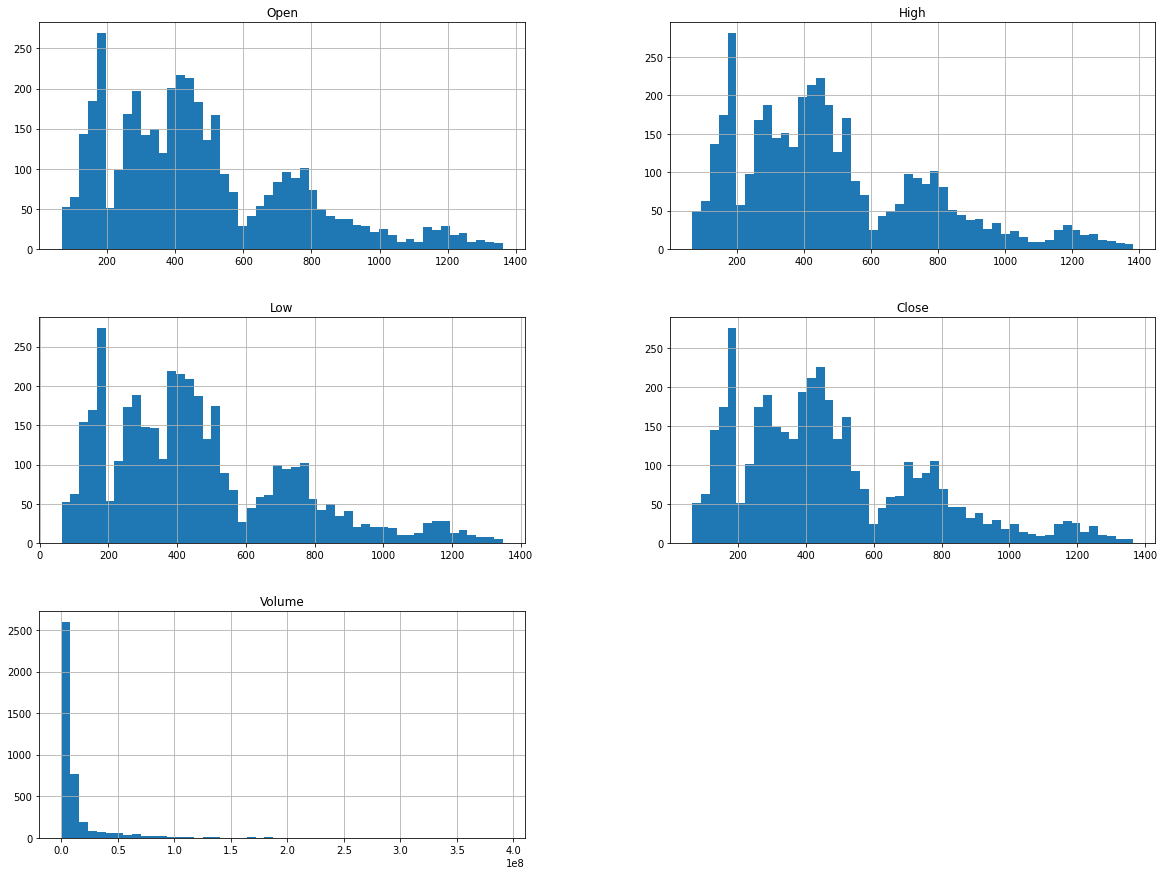

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(bins=50, figsize=(20, 15))

In [10]:
df['HighLoad'] = (df['High'] - df['Close']) / df['Close'] * 100.0
df['Change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
df = df[['Close', 'HighLoad', 'Change', 'Volume']]

In [11]:
df['MA10'] = df['Close'].rolling(10).mean()
df['MA30'] = df['Close'].rolling(30).mean()
df['MA50'] = df['Close'].rolling(50).mean()

df['rets'] = df['Close'] / df['Close'].shift(1) - 1

In [12]:
df

,Close,HighLoad,Change,Volume,MA10,MA30,MA50,rets
Date,,,,,,,,
2005-01-03,520.45,0.566817,2.069033,2947420,NaN,NaN,NaN,NaN
2005-01-04,519.80,1.183147,-0.716264,1775212,NaN,NaN,NaN,-0.001249
2005-01-05,503.70,3.107008,-2.478219,3849472,NaN,NaN,NaN,-0.030973
2005-01-06,493.20,3.284672,-1.556886,3014483,NaN,NaN,NaN,-0.020846
2005-01-07,492.75,1.065449,0.952674,1939641,NaN,NaN,NaN,-0.000912
...,...,...,...,...,...,...,...,...
2021-03-05,325.15,3.905890,-2.357357,86738909,329.315,316.733333,277.072,-0.041421
2021-03-08,321.25,3.268482,-3.165034,81925952,330.990,317.796667,279.978,-0.011994
2021-03-09,315.20,4.171954,-3.015385,74702208,330.110,318.998333,282.555,-0.018833


In [13]:
df.head()

,Close,HighLoad,Change,Volume,MA10,MA30,MA50,rets
Date,,,,,,,,
2005-01-03,520.45,0.566817,2.069033,2947420,NaN,NaN,NaN,NaN
2005-01-04,519.80,1.183147,-0.716264,1775212,NaN,NaN,NaN,-0.001249
2005-01-05,503.70,3.107008,-2.478219,3849472,NaN,NaN,NaN,-0.030973
2005-01-06,493.20,3.284672,-1.556886,3014483,NaN,NaN,NaN,-0.020846
2005-01-07,492.75,1.065449,0.952674,1939641,NaN,NaN,NaN,-0.000912


In [14]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [15]:
# Drop missing value
df.fillna(value=-99999, inplace=True)
    # We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(df)))
    # Separating the label here, we want to predict the AdjClose
forecast_col = 'Close'
df['label'] = df[forecast_col].shift(-forecast_out)
X = np.array(df.drop(['label'], 1))
    # Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
    # Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_forecast = X[-forecast_out:]
X = X[:-forecast_out]
    # Separate label and identify it as y
y = np.array(df['label'])
y = y[:-forecast_out]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
df.head()

,Close,HighLoad,Change,Volume,MA10,MA30,MA50,rets,label
Date,,,,,,,,,
2005-01-03,520.45,0.566817,2.069033,2947420,-99999.0,-99999.0,-99999.0,-99999.000000,479.10
2005-01-04,519.80,1.183147,-0.716264,1775212,-99999.0,-99999.0,-99999.0,-0.001249,487.40
2005-01-05,503.70,3.107008,-2.478219,3849472,-99999.0,-99999.0,-99999.0,-0.030973,479.00
2005-01-06,493.20,3.284672,-1.556886,3014483,-99999.0,-99999.0,-99999.0,-0.020846,482.35
2005-01-07,492.75,1.065449,0.952674,1939641,-99999.0,-99999.0,-99999.0,-0.000912,468.30


In [18]:
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [19]:
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)


    # KNN Regression
model_knn = KNeighborsRegressor(n_neighbors=2)
model_knn.fit(X_train, y_train)


    # Bayesian Ridge Regression
model_by = BayesianRidge()
model_by.fit(X_train, y_train)

BayesianRidge()

In [20]:
confidencereg = model.score(X_test, y_test)
confidence_model_knn = model_knn.score(X_test,y_test)
confidence_model_by = model_by.score(X_test,y_test)
    
reg = confidencereg * 100
knn = confidence_model_knn * 100
by = confidence_model_by * 100

score = " Regression {}\n KNN {}\n Bayesian {}\n ".format(reg,knn,by)

    # # results
score

' Regression 85.15344703687484\n KNN 78.0523719583919\n Bayesian 85.15259034358402\n '

In [21]:
forecast_reg = model.predict(X_forecast)
forecast_knn = model_knn.predict(X_forecast)
forecast_by = model_by.predict(X_forecast)

In [22]:
from datetime import timedelta

In [23]:
#Process all new columns data
df['Forecast_reg'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date
next_unix = last_unix + timedelta(days=1)

for i in forecast_reg:
    next_date = next_unix
    next_unix += timedelta(days=1)
    df.loc[next_date] = [np.nan for _ in range(len(df.columns))]
    df['Forecast_reg'].loc[next_date] = i

In [24]:
df

,Close,HighLoad,Change,Volume,MA10,MA30,MA50,rets,label,Forecast_reg
Date,,,,,,,,,,
2005-01-03,520.45,0.566817,2.069033,2947420.0,-99999.0,-99999.0,-99999.0,-99999.000000,479.10,NaN
2005-01-04,519.80,1.183147,-0.716264,1775212.0,-99999.0,-99999.0,-99999.0,-0.001249,487.40,NaN
2005-01-05,503.70,3.107008,-2.478219,3849472.0,-99999.0,-99999.0,-99999.0,-0.030973,479.00,NaN
2005-01-06,493.20,3.284672,-1.556886,3014483.0,-99999.0,-99999.0,-99999.0,-0.020846,482.35,NaN
2005-01-07,492.75,1.065449,0.952674,1939641.0,-99999.0,-99999.0,-99999.0,-0.000912,468.30,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,315.860141
2021-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.896070
2021-04-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,308.636306
